<a href="https://colab.research.google.com/github/yemioyeleke/Malaria_Detection_CNN/blob/main/Malaria_Detection_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Malaria is a deadly disease predominantly caused by a parasite name Plasmodium falciparum which is transmitted by mosquito. It shows symptoms such as high fever and chills, which not treated in due time can be fatal. The disease is diagnosed by capturing the cell images of the blood and the presence of parasitic stains can be used to detect the Malarial disease.

See More: https://lhncbc.nlm.nih.gov/LHC-research/LHC-projects/image-processing/malaria-screener.html

# Dataset

The study acquired cell images from 150 P. falciparum-infected and 50 uninfected patients in Giemsa-stained thin blood smears that were collected and photographed at Chittagong Medical College Hospital, Bangladesh. The dataset contains a total of 27,558 cell images with equal instances of parasitized and uninfected cells.


Giemsa-stained thick blood smear slides from 150 P. falciparum-infected patients were collected and photographed at Chittagong Medical College Hospital, Bangladesh.The study developed the first deep learning method that can detect P. falciparum parasites in thick blood smear images and can run on smartphones, which consists of two modules: an intensity-based Iterative Global Minimum Screening (IGMS) module for parasite candidate screening and a customized CNN classifier for final classification.

# Getting the Dataset

The Kaggle dataset consists of two folders namely uninfected and parasitized cell images. The images are color images which are resized to a dimension of
128
×
128

. The original dataset provides a total of around 25000 images. However, for running our simple DL algorithm we will be using only 100 images for each class

In [10]:
#Mount Google Drive: Run the following code to mount your Google Drive and authenticate the notebook to access your drive:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
#Create the necessary directories: Execute the following code to create the directories data/uninfected and data/parasitized in your Google Drive:
#Then upload the Malaria datasets inside the respective directories (uninfected and parasitized) on google drive.

#Here we initialize a set of lists X & Z for the images and the labels.

from tqdm import tqdm
import os

X = []
Z = []
IMG_SIZE = 128
root_dir = '/content/drive/MyDrive'

norm_dir = os.path.join(root_dir, 'data/uninfected')
mal_dir = os.path.join(root_dir, 'data/parasitized')

os.makedirs(norm_dir, exist_ok=True)
os.makedirs(mal_dir, exist_ok=True)

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [13]:
#OpenCV and Scikit-learn for image processing and machine learning respectivley.
import cv2
import os
from sklearn.feature_extraction import image

# Data Preprocessing

In [14]:
norm_dir

'/content/drive/MyDrive/data/uninfected'

# Creation of lists for the images and the labels

In [15]:
def make_train_data(ret_type, DIR):
    counter = 0  # Initialize the counter
    for img in tqdm(os.listdir(DIR)):
        label = assign_label(img, ret_type)
        path = os.path.join(DIR, img)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

        X.append(np.array(img))
        Z.append(str(label))

        counter += 1  # Increment the counter

        if counter == 100:
            break  # Break the loop after reading 100 files

In [16]:
#Here we create two functions for creating image lists and labels.

def assign_label(img,ret_type):
    return ret_type

def make_train_data(ret_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,ret_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

        X.append(np.array(img))
        Z.append(str(label))

In [17]:
#Here we call the functions to perform the array formation for the images and the labels.

make_train_data('uninfected',norm_dir)

100%|██████████| 100/100 [00:01<00:00, 84.52it/s]


In [ ]:
make_train_data('uninfected',norm_dir)

100%|██████████████████████████████████████████████████████████████████| 100/100


In [18]:
print(len(X))

100


In [20]:
make_train_data('Parasitized',mal_dir)

100%|██████████| 100/100 [00:01<00:00, 67.29it/s]


In [21]:
print(len(X))

200


# Plotting of the Sample Images

Here we plot some of the cell images of malarial and uninfected person blood.

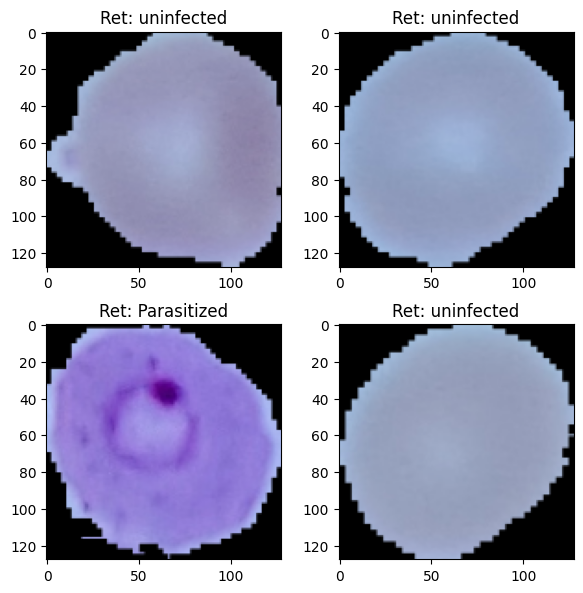

In [22]:
import random as rn
fig,ax=plt.subplots(2,2)
fig.set_size_inches(6,6)
for i in range(2):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Ret: '+Z[l])
        plt.tight_layout()

In [23]:
## Label Encoding. Here is a label preprocessing where we perform one hot encoding of the labels.
from sklearn.preprocessing import LabelEncoder
import tensorflow
from tensorflow.keras.utils import to_categorical

le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,2)
X=np.array(X)
X=X/255

The sklearn.preprocessing.LabelEncoder is imported to encode the labels in Z into numerical values. A LabelEncoder object is created with le = LabelEncoder().

The labels in Z are then transformed into encoded numerical values using le.fit_transform(Z). The transformed labels are stored in Y.

Next, tensorflow.keras.utils.to_categorical is imported to perform one-hot encoding on the encoded labels. The to_categorical function is used to convert the encoded labels Y into one-hot encoded vectors, specifying the number of classes as 2 (assuming there are two classes in the data).

The image data X is converted into a numpy array using np.array(X).

Finally, the pixel values of X are normalized by dividing each pixel by 255. This step is typically performed to scale the pixel values between 0 and 1, which can improve the model's performance.

# Data Splitting

In [24]:
#Here we perform the splitting of the dataset into Training (75%) and Testing (25%) datasets.

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)
print(x_train.shape)

(150, 128, 128, 3)


In [25]:
print(y_train.shape)

(150, 2)


In [26]:
print(x_train.shape)

#The shape (150, 128, 128, 3) of your x_train indicates that you have 150 training examples, each with a height and width of 128 pixels,
#and with 3 color channels (RGB) for each pixel.

(150, 128, 128, 3)


In [27]:
print(y_test.shape)

(50, 2)


In [28]:
print(x_test.shape)

(50, 128, 128, 3)


# Deep Learning Model based on CNN

Here we will use 4 Convolutional blocks and 4 Max-Pooling blocks. Finally we will be having a classification layer based on SOFTMAX function for classifying the cell images as uninfected or parasitized.

In [99]:
# Modelling starts using a CNN.
from tensorflow.keras.models import Sequential
import tensorflow as tf

model = Sequential()
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (128,128,3)))

Here's an explanation of the model:

- filters: It specifies the number of filters or convolutional kernels in the
layer. In this case, the layer will have 32 filters. Each filter is responsible for learning specific features from the input data.

- kernel_size: It defines the size of the convolutional kernel (or filter) to be used. Here, (5,5) indicates that the kernel will have a size of 5x5 pixels.

- padding: It determines the padding scheme to be applied to the input image. In this case, 'Same' padding is used, which means the input image is padded with zeros to ensure that the output feature map has the same spatial dimensions as the input.

- activation: It specifies the activation function to be applied after the convolution operation. Here, 'relu' (Rectified Linear Unit) activation is used, which introduces non-linearity to the output of the convolution operation.

- input_shape: It defines the shape of the input data. In this case, the input shape is (128, 128, 3), indicating that the input images have a height and width of 128 pixels, and three color channels (RGB).

# Deep learning model architecture

The line of code model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2))) adds a MaxPooling2D layer to a TensorFlow Keras model.

- tf.keras.layers.MaxPooling2D: This is the class representing the MaxPooling2D layer in TensorFlow Keras. Max pooling is a downsampling operation that reduces the spatial dimensions (height and width) of the input feature maps while preserving the most important features.

- pool_size=(2,2): It specifies the size of the pooling window or kernel. In this case, (2,2) indicates a 2x2 window. During the pooling operation, the input feature maps are divided into non-overlapping 2x2 regions, and the maximum value within each region is retained.

- By adding this line to a model, you are incorporating a MaxPooling2D layer that performs downsampling on the feature maps obtained from the previous layers. The pooling operation helps in reducing the spatial dimensions, controlling overfitting, and extracting the most prominent features from the input.

- tf.keras.layers.Flatten: This is the class representing the Flatten layer in TensorFlow Keras. The Flatten layer is used to convert multi-dimensional input into a one-dimensional array or vector. The purpose of the Flatten layer is to transform the output from the previous layer, which may have a multi-dimensional shape, into a flattened format that can be fed into a fully connected or dense layer. For example, prior to the Flatten layer, the output from a Convolutional layer in a CNN will have a 3D shape such as (batch_size, height, width, channels). The Flatten layer reshapes this output into a 1D vector with dimensions (batch_size, flattened_size), where flattened_size is the product of height, width, and channels.

- Dense layers are fully connected layers, where each neuron is connected to every neuron in the previous layer.

- activation="softmax": It specifies the activation function to be applied to the output of the Dense layer. In this case, the "softmax" activation function is used. Softmax is commonly used in multi-class classification problems as it converts the output values into probabilities, indicating the likelihood of each class.

-  The Dense layer will take the flattened input from the previous layer and perform a matrix multiplication followed by an element-wise activation function on it. The output of this layer will be a 2-dimensional tensor.

In [100]:
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model.add(tf.keras.layers.Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(tf.keras.layers.Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512,activation ='relu'))
model.add(tf.keras.layers.Dense(2, activation = "softmax"))

In [101]:
#Finally, the Cell Image Classification Model

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 128, 128, 32)      2432      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 96)        55392     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 16, 16, 96)      

# Model Compile

In [102]:
#Here we compile the CNN model for checking any errors and initialize the ADAM optimizer. We have used Cross-Entropy has our loss function.

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

- optimizer=tf.keras.optimizers.Adam(lr=0.001): It specifies the optimizer to be used during training. In this case, the Adam optimizer is selected with a learning rate of 0.001. The optimizer is responsible for updating the model's parameters based on the calculated gradients, aiming to minimize the loss function.

- loss='categorical_crossentropy': It specifies the loss function to be used during training. In this case, categorical cross-entropy is chosen. Categorical cross-entropy is a common loss function used in multi-class classification problems where the target variable is one-hot encoded.

- metrics=['accuracy']: It specifies the evaluation metric(s) to be used during training and evaluation. In this case, the accuracy metric is selected, which calculates the accuracy of the model's predictions.

By compiling the model with these configurations, you are preparing it for training. The optimizer will update the model's parameters based on the computed gradients, the loss function will be used to measure the discrepancy between the predicted and true values, and the accuracy metric will be used to monitor the performance of the model during training and evaluation.

# Model Training

In [103]:
history = model.fit(x_train, y_train,
                    batch_size=4,
                    epochs=10,
                    # We pass some validation for
                    # monitoring validation loss and metrics
                    # at the end of each epoch
                    validation_data=(x_test, y_test))

Epoch 1/10
38/38 [==============================] - 4s 14ms/step - loss: 0.7089 - accuracy: 0.5467 - val_loss: 0.6950 - val_accuracy: 0.4600
Epoch 2/10
38/38 [==============================] - 0s 9ms/step - loss: 0.6930 - accuracy: 0.5133 - val_loss: 0.6936 - val_accuracy: 0.4600
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 0.6932 - accuracy: 0.4800 - val_loss: 0.6936 - val_accuracy: 0.4600
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 0.6934 - accuracy: 0.5133 - val_loss: 0.6931 - val_accuracy: 0.4600
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 0.6972 - accuracy: 0.5400 - val_loss: 0.6894 - val_accuracy: 0.5800
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 0.6909 - accuracy: 0.4933 - val_loss: 0.6876 - val_accuracy: 0.5800
Epoch 7/10
38/38 [==============================] - 0s 7ms/step - loss: 0.6734 - accuracy: 0.5467 - val_loss: 0.6637 - val_accuracy: 0.7000
Epoch 8/10
38/38 [=

In [104]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# Plotting

Final Training Loss: 0.4801226854324341
Final Training Accuracy: 0.8333333134651184
Final Validation Loss: 0.556648313999176
Final Validation Accuracy: 0.7799999713897705


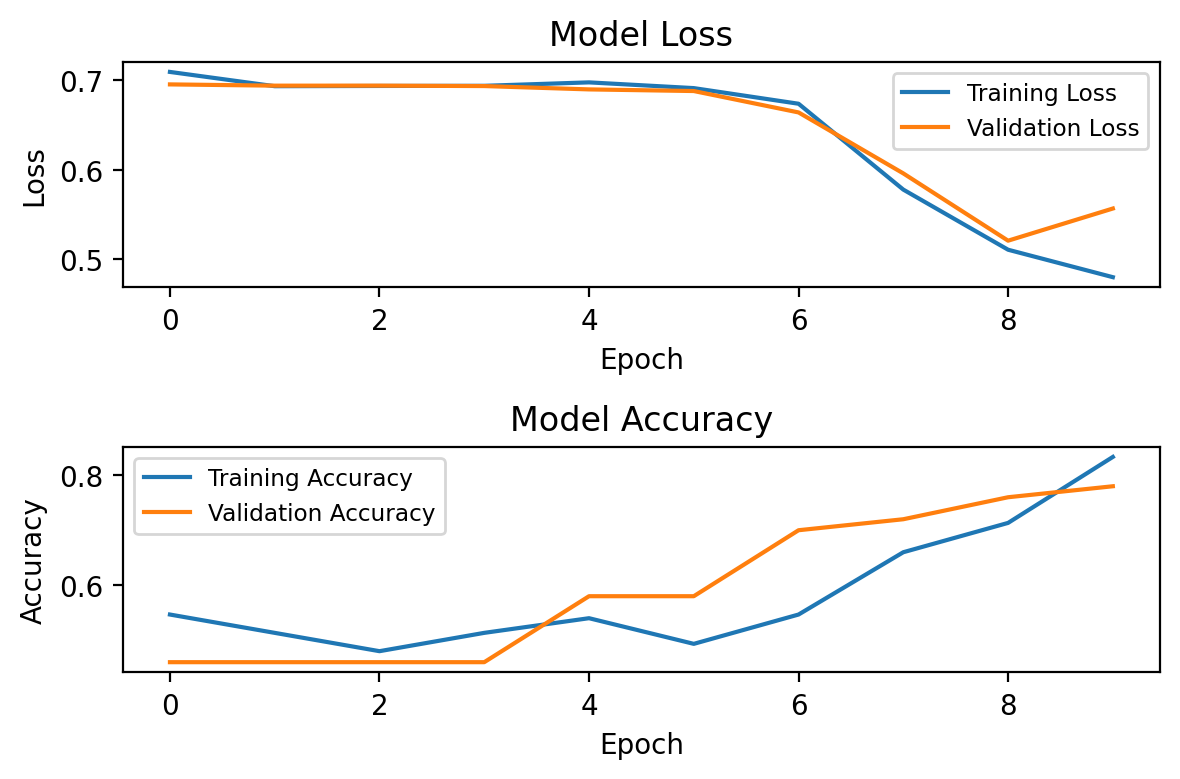

In [105]:
plt.rcParams["figure.dpi"] = 200
plt.rcParams["figure.figsize"] = (6, 4)

# Plot loss
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(fontsize='small')

# Plot accuracy
plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(fontsize='small')

# Show final scores
print("Final Training Loss:", history.history['loss'][-1])
print("Final Training Accuracy:", history.history['accuracy'][-1])
print("Final Validation Loss:", history.history['val_loss'][-1])
print("Final Validation Accuracy:", history.history['val_accuracy'][-1])

# Adjust subplots layout
plt.tight_layout()

# Display the plot
plt.show()

## Interpretation of Ouput Results/Values

In general, a lower validation loss value is desirable, as it indicates that the model has achieved better performance on the validation set.

Note: If the validation loss is significantly higher than the training loss, it could suggest that the model is overfitting, meaning it is performing well on the training data but not generalizing well to unseen data.



## Hyperparameter tuning

Most machine learning problems require a lot of hyperparameter tuning.  Unfortunately, we can't provide concrete tuning rules for every model. Lowering the learning rate can help one model converge efficiently but make another model converge much too slowly.  You must experiment to find the best set of hyperparameters for your dataset. That said, here are a few rules of thumb:

 * Training loss should steadily decrease, steeply at first, and then more slowly until the slope of the curve reaches or approaches zero.
 * If the training loss does not converge, train for more epochs.
 * If the training loss decreases too slowly, increase the learning rate. Note that setting the learning rate too high may also prevent training loss from converging.
 * If the training loss varies wildly (that is, the training loss jumps around), decrease the learning rate.
 * Lowering the learning rate while increasing the number of epochs or the batch size is often a good combination.
 * Setting the batch size to a *very* small batch number can also cause instability. First, try large batch size values. Then, decrease the batch size until you see degradation.
 * For real-world datasets consisting of a very large number of examples, the entire dataset might not fit into memory. In such cases, you'll need to reduce the batch size to enable a batch to fit into memory.

# Model Prediction for Evaluation

In [106]:
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes=np.argmax(y_test,axis=1)

2/2 [==============================] - 0s 8ms/step


In [110]:
predicted_classes

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1])

In [111]:
true_classes

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1])

# Testing Accuracy and Confusion Matrix

In [107]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
print('Accuracy for malaria infection classifier=',metrics.accuracy_score(predicted_classes,true_classes))

Accuracy for malaria infection classifier= 0.78


# Visualize the Predicted Malaria-Infected and Uninfected Cells

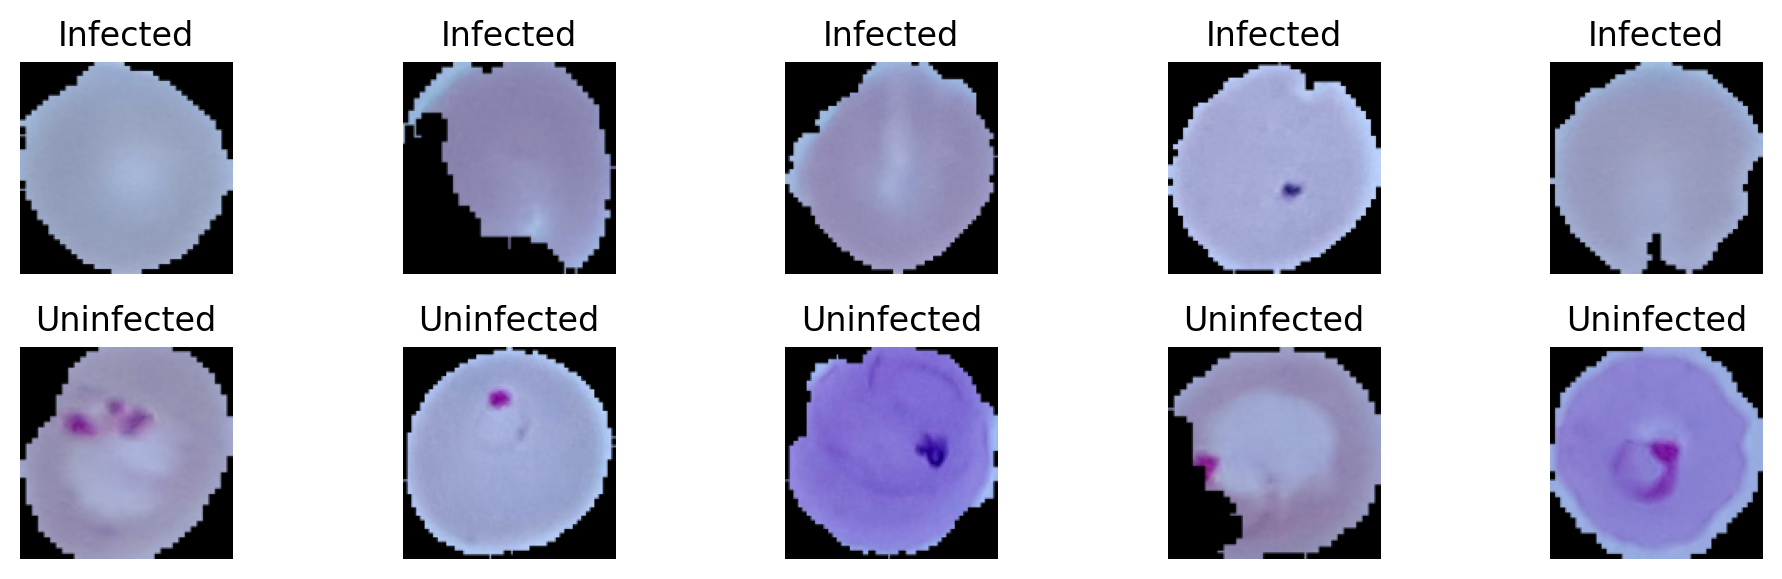

In [108]:
import matplotlib.pyplot as plt

infected_samples = x_test[predicted_classes == 1]  # Get samples predicted as infected
uninfected_samples = x_test[predicted_classes == 0]  # Get samples predicted as uninfected

# Plot infected cell samples
plt.figure(figsize=(10, 3))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(infected_samples[i])
    plt.title("Infected")
    plt.axis("off")

# Plot uninfected cell samples
for i in range(5):
    plt.subplot(2, 5, 5+i+1)
    plt.imshow(uninfected_samples[i])
    plt.title("Uninfected")
    plt.axis("off")

plt.tight_layout()
plt.show()

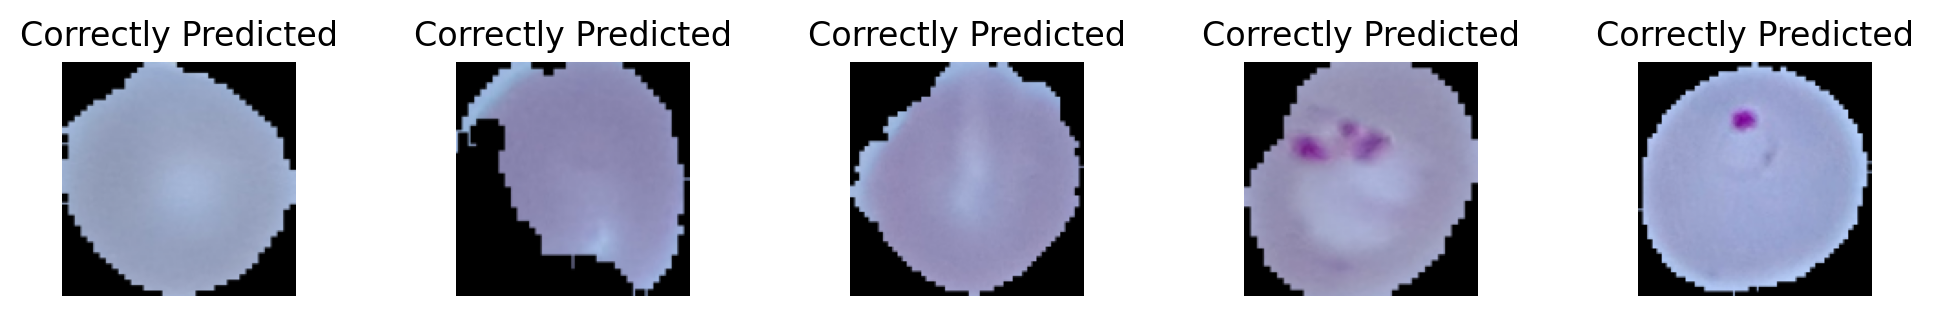

In [119]:
correctly_predicted_samples = x_test[predicted_classes == true_classes]

# Plot correctly predicted samples
plt.figure(figsize=(10, 3))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(correctly_predicted_samples[i])
    plt.title("Correctly Predicted")
    plt.axis("off")

plt.tight_layout()
plt.show()

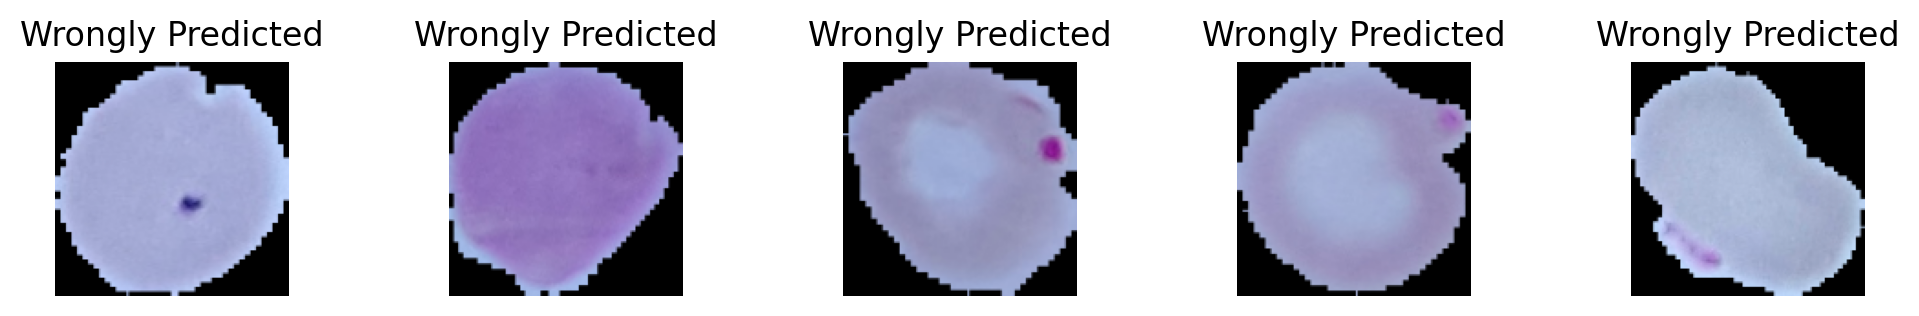

In [116]:
incorrectly_predicted_samples = x_test[predicted_classes != true_classes]

# Plot wrongly predicted samples
plt.figure(figsize=(10, 3))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(incorrectly_predicted_samples[i])
    plt.title("Wrongly Predicted")
    plt.axis("off")

plt.tight_layout()
plt.show()

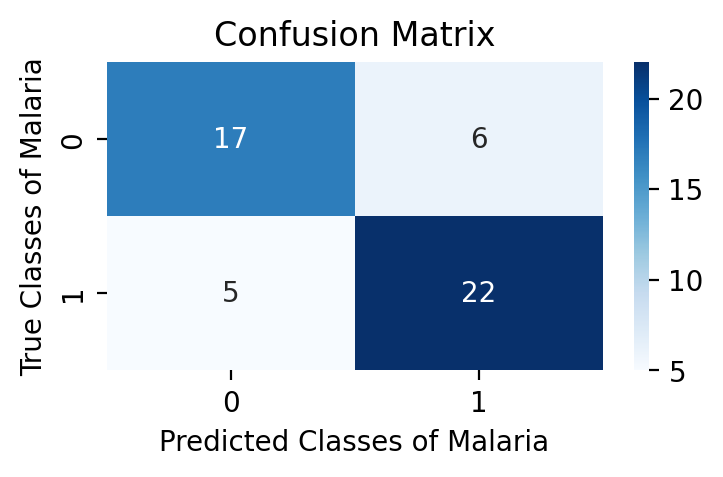

In [67]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Classes of Malaria")
plt.ylabel("True Classes of Malaria")
plt.show()

# ROC PLOTING

ROC (Receiver Operating Characteristic) plot is a graphical representation of the performance of a binary classification model. It is created by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at various classification thresholds.

In [68]:
from sklearn.metrics import roc_curve, auc
fpr_keras, tpr_keras, thresholds_keras = roc_curve(true_classes, predictions[:,1])
auc_rf = auc(fpr_keras, tpr_keras)
auc_rf

0.8067632850241546

- The roc_curve() function is used to calculate the False Positive Rate (FPR), True Positive Rate (TPR), and corresponding thresholds based on the true class labels and predicted probabilities. The roc_curve() function returns three arrays: fpr_keras (FPR values), tpr_keras (TPR values), and thresholds_keras (classification thresholds).

- The auc() function takes the FPR and TPR arrays as inputs and calculates the Area Under the Curve (AUC) for the ROC curve. The AUC score represents the overall performance of the model in distinguishing between the positive and negative classes.

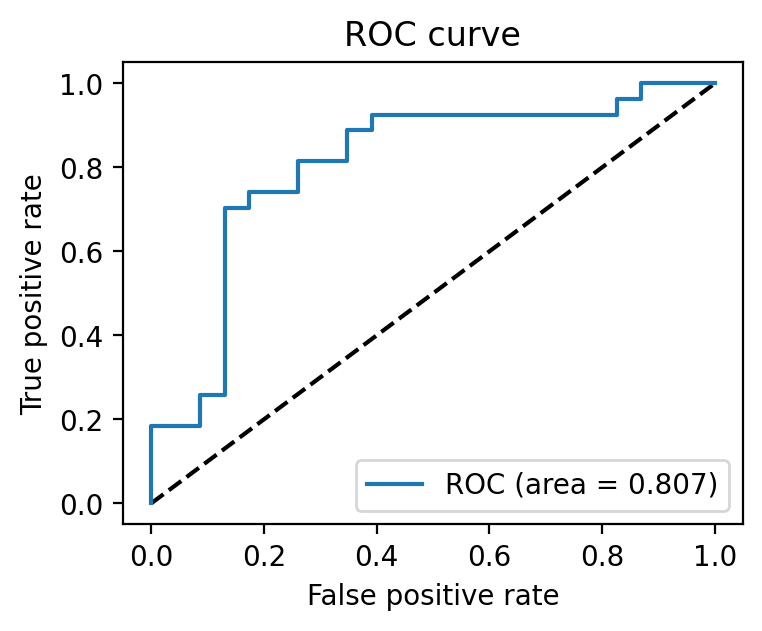

In [70]:
plt.rcParams["figure.figsize"] = (4,3)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='ROC (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# Conclusion

- The successful classification of malaria-infected and uninfected cells is of great significance in the field of medical diagnostics. Accurate identification of infected cells is crucial for timely and effective treatment of malaria. The CNN's capability to accurately classify these cells showcases its potential as a valuable tool in assisting medical professionals with malaria diagnosis.

- Based on the results obtained from the CNN model, it can be concluded that training the model with more data would be beneficial. The model's performance, as indicated by the accuracy and other evaluation metrics, may improve with a larger and more diverse dataset.

- By training the CNN with more data, the model would have the opportunity to learn from a wider range of examples, potentially enhancing its ability to generalize and make accurate predictions.

- Additionally, increasing the dataset size can help mitigate overfitting, a phenomenon where the model becomes overly specialized to the training data and performs poorly on unseen examples. By exposing the model to more diverse samples, it can learn to generalize better and make more accurate predictions on unseen data.